<a href="https://colab.research.google.com/github/gachet/ad-1-24/blob/main/LOG/multiclass-logistic-jose-oreja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# PRÁCTICA: MULTICLASS LOGISTIC REGRESSION (OVR)

'''
 En esta práctica vamos a:
 1. Cargar train.csv y test.csv desde Google Drive.
 2. Visualizar los datos del conjunto de entrenamiento.
 3. Entrenar una regresión logística multiclase (one-vs-rest).
 4. Obtener la matriz Theta 3x3 con los parámetros del modelo.
 5. Evaluar el modelo con el test.
 6. Dibujar las rectas de decisión de cada clase.

 Todo funciona automáticamente usando tus enlaces de Drive.
'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
# IDs de los ficheros en Google Drive (a partir de tus enlaces)
id_train = "1wwMUMI0ieMcc3Uf7I2CUAdI4oEoQiQP-"
id_test = "1KNbounJNAEDdbfw4hqVHfK6IStx1ROJD"

# URLs de descarga directa para pandas
url_train = f"https://drive.google.com/uc?id={id_train}"
url_test = f"https://drive.google.com/uc?id={id_test}"

# Cargar los datos
train = pd.read_csv(url_train)
test = pd.read_csv(url_test)

print("Primeras filas de train:")
display(train.head())

print("\nPrimeras filas de test:")
display(test.head())


Primeras filas de train:


,x1,x2,y
0,22.63,61.39,0
1,99.38,27.28,1
2,94.32,66.42,2
3,23.43,40.44,0
4,98.36,8.14,1



Primeras filas de test:


,x1,x2,y
0,0.67,12.95,0
1,1.73,49.58,0
2,50.02,42.06,1
3,28.86,74.61,2
4,62.80,58.86,1


In [ ]:
#Distribución de clases:

print("Dimensiones train:", train.shape)
print("Dimensiones test:", test.shape)

print("\nInformación de train:")
print(train.describe())

print("\nDistribución de clases en train:")
print(train['y'].value_counts())


Dimensiones train: (100, 3)
Dimensiones test: (10, 3)

Información de train:
               x1         x2           y
count  100.000000  100.00000  100.000000
mean    47.990900   48.33240    0.960000
std     29.719618   28.18862    0.803025
min      0.670000    0.06000    0.000000
25%     22.682500   27.47500    0.000000
50%     46.690000   50.63000    1.000000
75%     73.772500   68.89250    2.000000
max     99.380000   99.32000    2.000000

Distribución de clases en train:
y
1    36
0    34
2    30
Name: count, dtype: int64


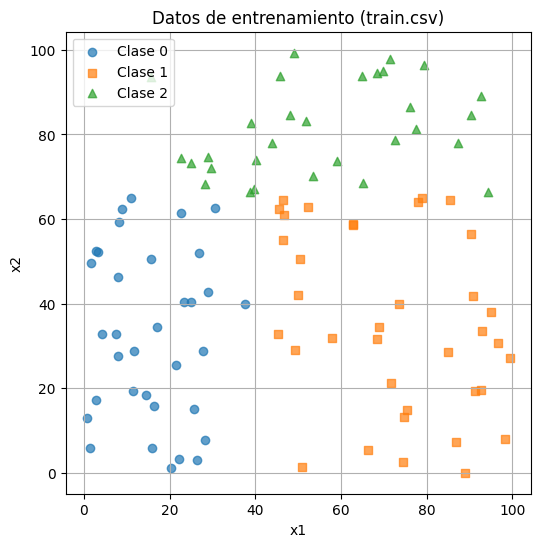

In [ ]:
#Visualización de los datos de entrenamiento:

plt.figure(figsize=(6, 6))

marcadores = ['o', 's', '^']
for clase, marcador in zip([0, 1, 2], marcadores):
    datos_clase = train[train['y'] == clase]
    plt.scatter(datos_clase['x1'], datos_clase['x2'],
                marker=marcador, alpha=0.7, label=f"Clase {clase}")

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Datos de entrenamiento (train.csv)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Matrices de características (X) y vectores de etiquetas (y)

# Creamos las matrices de características (X) y los vectores
# de etiquetas (y) para train y test.
# Esto será usado para entrenar y evaluar el modelo.

X_train = train[['x1', 'x2']].values
y_train = train['y'].values

X_test = test[['x1', 'x2']].values
y_test = test['y'].values

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (100, 2)
y_train shape: (100,)
X_test shape: (10, 2)
y_test shape: (10,)


In [ ]:
# multi_class='ovr' -> esquema one-vs-rest (tres regresiones logísticas, una por clase)
modelo = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=1000)
modelo.fit(X_train, y_train)

print("Modelo entrenado correctamente.")


Modelo entrenado correctamente.


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
# Cada clase tiene:
#   - intercept_ (θ0)
#   - coef_ (θ1, θ2)
#
# Agrupamos todo en una única matriz de tamaño 3x3:
#    [θ0  θ1  θ2]


# Interceptos (theta_0) para cada clase
interceptos = modelo.intercept_        # shape (3,)

# Coeficientes (theta_1 y theta_2) para cada clase
coeficientes = modelo.coef_            # shape (3, 2)

print("Interceptos (uno por clase):")
print(interceptos)

print("\nCoeficientes (filas = clases, columnas = [x1, x2]):")
print(coeficientes)

# Construimos la matriz Theta 3x3 = [theta0, theta1, theta2] por fila
Theta = np.hstack([interceptos.reshape(-1, 1), coeficientes])

print("\nMatriz Theta (3x3):")
print(Theta)


Interceptos (uno por clase):
[  22.61599832   -2.12605701 -100.5195314 ]

Coeficientes (filas = clases, columnas = [x1, x2]):
[[-0.43205445 -0.17723708]
 [ 0.09011903 -0.06478294]
 [ 0.00508767  1.52311684]]

Matriz Theta (3x3):
[[ 2.26159983e+01 -4.32054447e-01 -1.77237083e-01]
 [-2.12605701e+00  9.01190295e-02 -6.47829365e-02]
 [-1.00519531e+02  5.08766842e-03  1.52311684e+00]]


In [ ]:
# Probamos el modelo con train y test para ver cómo rinde.
# El valor importante es el de test, porque es el que mide
# la generalización del modelo.


# Predicciones en train y test
y_pred_train = modelo.predict(X_train)
y_pred_test = modelo.predict(X_test)

# Accuracy
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

print(f"Accuracy en train: {acc_train:.3f}")
print(f"Accuracy en test:  {acc_test:.3f}")

print("\nMatriz de confusión (test):")
print(confusion_matrix(y_test, y_pred_test))

print("\nInforme de clasificación (test):")
print(classification_report(y_test, y_pred_test))


Accuracy en train: 0.980
Accuracy en test:  1.000

Matriz de confusión (test):
[[3 0 0]
 [0 3 0]
 [0 0 4]]

Informe de clasificación (test):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         4

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



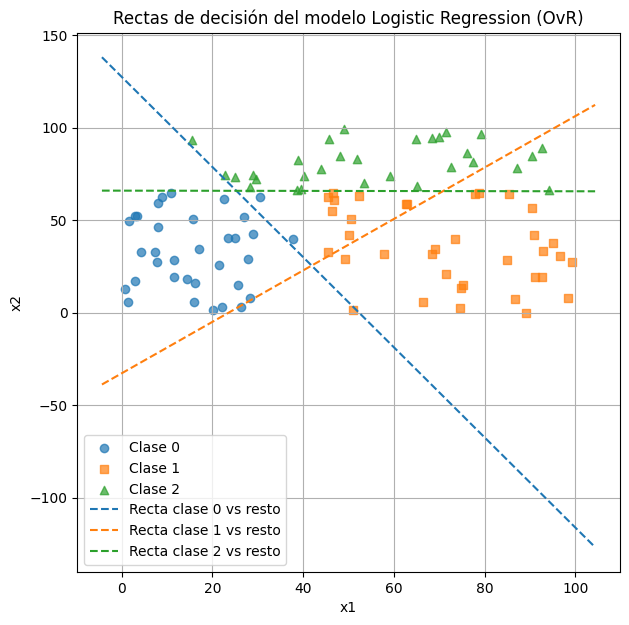

In [ ]:
#DIBUJAMOS LAS RECTAS DE DECISIÓN DEL MODELO ONE-VS-REST:

# Para cada clase k, existe una frontera lineal definida por:
#
#             θ0 + θ1*x1 + θ2*x2 = 0
#
# Despejamos x2 y dibujamos las rectas junto a los datos.


plt.figure(figsize=(7, 7))

# Dibujar puntos del train
marcadores = ['o', 's', '^']
for clase, marcador in zip([0, 1, 2], marcadores):
    subset = train[train['y'] == clase]
    plt.scatter(subset['x1'], subset['x2'],
                marker=marcador, alpha=0.7, label=f"Clase {clase}")

# Crear rango para x1
x1_min, x1_max = train['x1'].min() - 5, train['x1'].max() + 5
x1_vals = np.linspace(x1_min, x1_max, 200)

# Dibujar una recta por clase
for k in range(3):
    theta0, theta1, theta2 = Theta[k]

    # Evitamos divisiones por cero en θ2
    if abs(theta2) < 1e-6:
        continue

    x2_vals = -(theta0 + theta1*x1_vals) / theta2
    plt.plot(x1_vals, x2_vals, linestyle="--", label=f"Recta clase {k} vs resto")

plt.title("Rectas de decisión del modelo Logistic Regression (OvR)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid(True)
plt.show()
